In [2]:
print("hello world")

hello world


In [3]:
#comentar
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [21]:
#comentar
img = mpimg.imread('/Users/Clod/Downloads/img.jpeg')
img1 = mpimg.imread('/Users/Clod/Downloads/HandCalculatorPR/testImages/11.png')
img2 = mpimg.imread('/Users/Clod/Downloads/HandCalculatorPR/testImages/11p.jpeg')

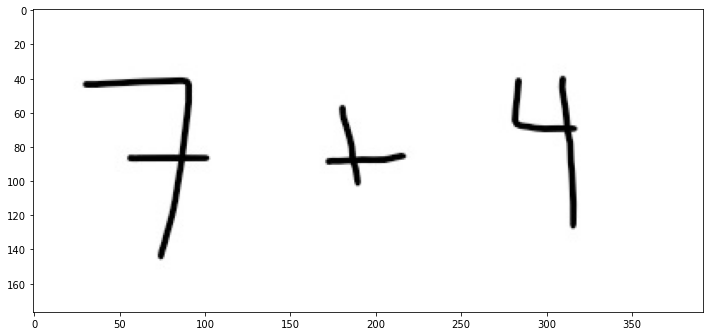

In [22]:
fig = plt.figure(figsize=(12,6))
imgplot = plt.imshow(img)
plt.show()

In [38]:
import cv2

# Load image
#img = cv2.imread('/Users/Clod/Downloads/HandCalculatorPR/testImages/11.png')
img = cv2.imread('/Users/Clod/Downloads/img.jpeg')


# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Apply connected components algorithm
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Filter out small and non-rectangular components
filtered_stats = []
for i in range(nlabels):
    if stats[i][0] == 0 or stats[i][1] == 0:
        continue
    if stats[i][2]/stats[i][3] > 5 or stats[i][3]/stats[i][2] > 5:
        continue
    if stats[i][4] < 100:
        continue
    filtered_stats.append(stats[i])

# Sort by x-position
filtered_stats = sorted(filtered_stats, key=lambda x: x[0])

# Slice the image based on the positions of the connected components
slices = []
for i in range(len(filtered_stats)):
    x, y, w, h, size = filtered_stats[i]
    slice_img = img[y:y+h, x:x+w]
    slices.append(slice_img)


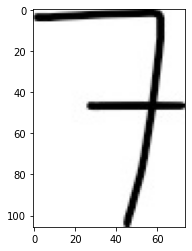

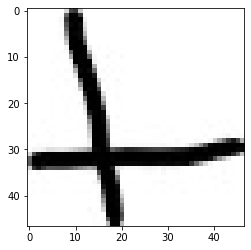

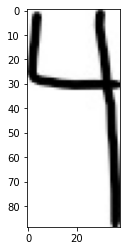

In [39]:
for img in slices:
    plt.imshow(np.squeeze(img), cmap='gray')
    plt.show()

In [13]:
print(img.shape)
print(img[0].shape)
print(img[0,0].shape)
print(img[0,0,0].shape)
type(img)

(366, 720, 4)
<class 'tuple'>
(720, 4)
(4,)
()


numpy.ndarray

In [11]:
data_matrix = img.reshape(-1,4)
data_matrix.shape

(263520, 4)

In [12]:
print(data_matrix[:,0])

[1. 1. 1. ... 1. 1. 1.]


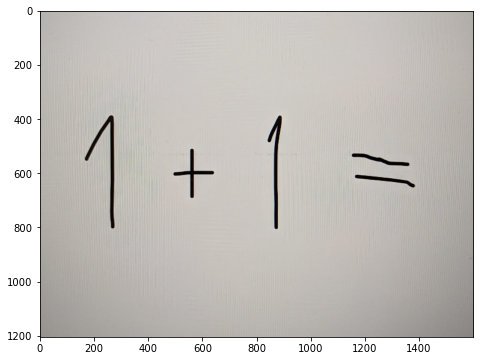

In [15]:
fig = plt.figure(figsize=(12,6))
imgplot = plt.imshow(img2)
plt.show()

In [16]:
print(img2.shape)
print(img2[0])
print(img2[0,0])
print(img2[0,0,0])
type(img2)

(1204, 1600, 3)
[[179 176 167]
 [179 176 171]
 [180 176 177]
 ...
 [175 172 167]
 [174 171 166]
 [174 171 166]]
[179 176 167]
179


numpy.ndarray

In [17]:
data_matrix2 = img2.reshape(-1,3)
data_matrix2.shape

(1926400, 3)

# MNIST

In [14]:
import cv2

from keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test data
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Convert to numpy array
images = np.array(images)
labels = np.array(labels)

# Read the image
one = cv2.imread("one.png", cv2.IMREAD_GRAYSCALE)

# Resize the image
one = cv2.resize(one, (28, 28))

# Normalize the pixel values
# img = img / 255.0

# Reshape the image
one = one.reshape(-1, 28, 28, 1)

# Predict the label using your trained MNIST classifier
# label = model.predict(img)

# Print the predicted label
# print("The predicted label is:", label)

2023-04-17 15:57:05.457796: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[ WARN:0@40.842] global loadsave.cpp:244 findDecoder imread_('one.png'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
print(img.shape)

In [ ]:
imgplot = plt.imshow(one)


In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy: ", test_acc)


In [ ]:
x_train[0].shape

In [ ]:
one.shape

In [ ]:
model.predict(one)